In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

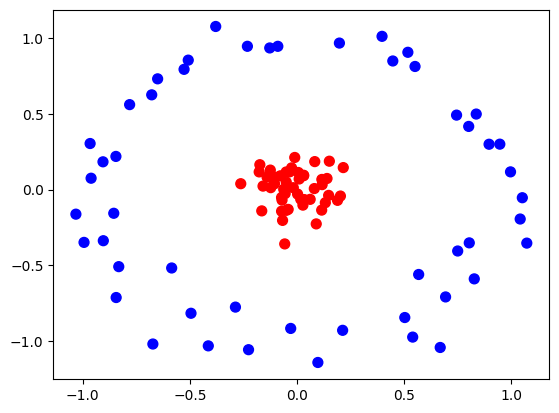

In [4]:
# %pip install scikit-learn

from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [6]:

classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [7]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6

In [8]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13896\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


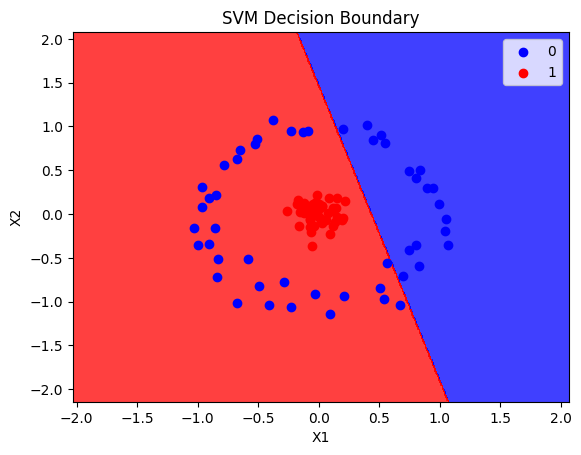

In [9]:

plot_decision_boundary(X, y, classifier)

In [10]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

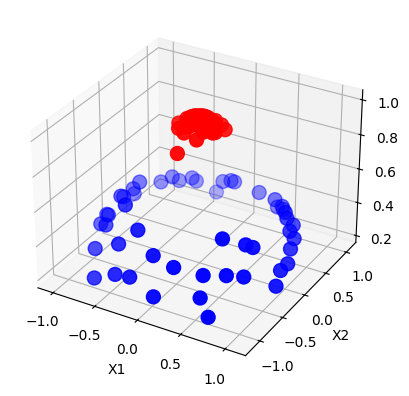

In [11]:

plot_3d_plot(X,y)

In [12]:

rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [13]:

accuracy_score(y_test, y_pred)

1.0

C:\Users\HP\AppData\Local\Temp\ipykernel_13896\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


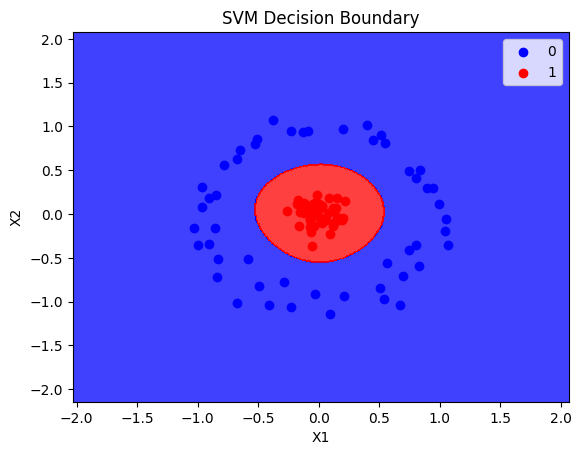

In [14]:

plot_decision_boundary(X, y, rbf_classifier)

In [15]:

poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [16]:

accuracy_score(y_test, y_pred)

1.0

C:\Users\HP\AppData\Local\Temp\ipykernel_13896\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


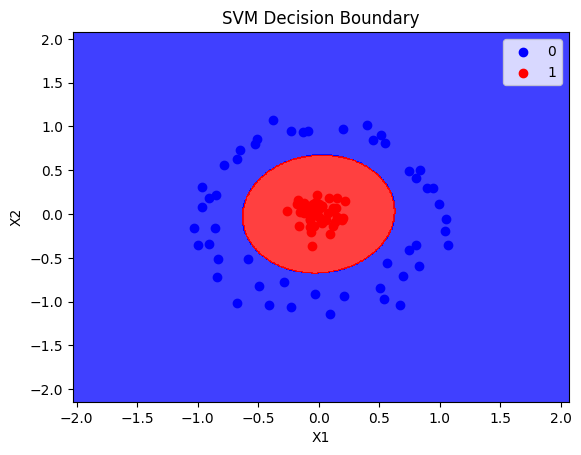

In [17]:

plot_decision_boundary(X, y, poly_classifier)

In [18]:

X

array([[-0.10069554,  0.08055362],
       [-0.04119445, -0.13125154],
       [-0.17644162,  0.11634451],
       [-0.11010541,  0.08293423],
       [ 0.51744213,  0.90683722],
       [ 0.44716908,  0.84940858],
       [ 0.03118384,  0.09425281],
       [ 0.56787014, -0.5614557 ],
       [ 0.55090272,  0.81313549],
       [-0.077892  ,  0.09045334],
       [-0.90538318,  0.18307347],
       [ 0.00283137, -0.03026544],
       [-0.41394697, -1.0331591 ],
       [-0.16441056, -0.14118259],
       [ 0.0174952 , -0.06420864],
       [-0.02929823, -0.9180032 ],
       [-0.17334442,  0.16403751],
       [ 0.74473017,  0.49165194],
       [-0.50747987,  0.85497087],
       [ 0.82731309, -0.59045058],
       [ 0.08983877, -0.22717163],
       [ 0.39691331,  1.01227422],
       [-0.96085847,  0.07465554],
       [ 0.21302348, -0.9304227 ],
       [ 0.01011215,  0.06958903],
       [ 0.53999694, -0.97521447],
       [-0.08944626,  0.94632372],
       [-0.84505622,  0.21868172],
       [-0.06727552,

In [19]:

np.exp(-(X**2)).sum(1)

array([1.98344376, 1.98122502, 1.95590311, 1.9810955 , 1.20449803,
       1.30478848, 1.99018379, 1.45397218, 1.25447146, 1.98580278,
       1.4075951 , 1.99907641, 1.18642028, 1.95359604, 1.9955797 ,
       1.42967559, 1.94384917, 1.35956345, 1.25439321, 1.21002194,
       1.94166355, 1.21314694, 1.3916684 , 1.37639787, 1.99506682,
       1.13340753, 1.40042296, 1.44292653, 1.9547082 , 1.40703244,
       1.97886786, 1.98220411, 1.35692267, 1.97404842, 1.3336274 ,
       1.98758665, 1.99617475, 1.98495906, 1.94305401, 1.47460073,
       1.99205151, 1.97467006, 1.99624427, 1.96825375, 1.30544976,
       1.97511609, 1.27655758, 1.26527297, 1.95975245, 1.24082459,
       1.98866676, 1.99391962, 1.36209977, 0.98876018, 1.98410068,
       1.27188128, 1.27335283, 1.36652622, 1.93363622, 1.27635335,
       1.32226396, 1.30059301, 1.46754675, 1.19865702, 1.09144407,
       1.99073365, 1.98529022, 1.98736509, 1.1792362 , 1.87548567,
       1.96845852, 1.95791895, 1.29532099, 1.30757555, 1.22243

In [20]:

X_new=np.exp(-(X**2))

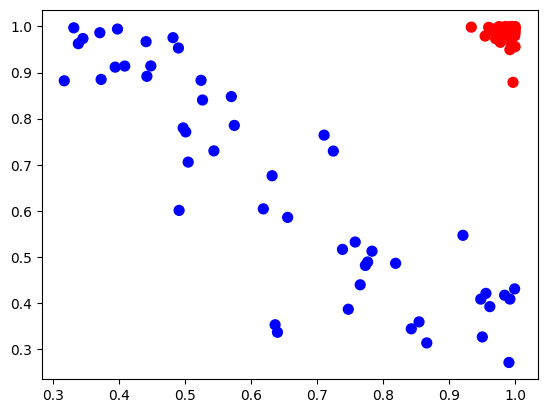

In [21]:

plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')